# Supervised Learning Using Ensemble Methods

In [34]:
import numpy as np
import pandas as pd
import pickle
import time

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals import joblib

import lightgbm as lgb

from preprocess import make_preprocessor, get_columns

In [35]:
mailout_train_clean = pd.read_csv('../data/Udacity_MAILOUT_052018_TRAIN_clean.csv', sep=';')
mailout_train_clean.shape

(42962, 383)

In [36]:
lnr = mailout_train_clean.LNR
y = mailout_train_clean.RESPONSE
X = mailout_train_clean.drop(['RESPONSE', 'LNR'], axis=1)
X.shape

(42962, 381)

In [37]:
# Load feature info
feat_info = pd.read_csv('../features.csv')
feat_info.set_index('attribute', inplace=True)

In [54]:
# Make the preprocessor
numerical, categorical = get_columns(X.columns, feat_info)
preprocessor = make_preprocessor(numerical, categorical)

X_processed = preprocessor.fit_transform(X)

In [47]:
numerical

['ANZ_STATISTISCHE_HAUSHALTE',
 'ANZ_PERSONEN',
 'ANZ_HAUSHALTE_AKTIV',
 'ANZ_HH_TITEL',
 'ANZ_KINDER',
 'ANZ_TITEL',
 'KBA13_ANZAHL_PKW',
 'MIN_GEBAEUDEJAHR']

In [40]:
categorical

['KBA13_CCM_2501',
 'D19_VERSICHERUNGEN',
 'GREEN_AVANTGARDE',
 'KBA05_ZUL2',
 'KBA13_HERST_FORD_OPEL',
 'CJT_TYP_4',
 'D19_NAHRUNGSERGAENZUNG',
 'VERS_TYP',
 'ORTSGR_KLS9',
 'KOMBIALTER',
 'CJT_GESAMTTYP',
 'D19_LETZTER_KAUF_BRANCHE_D19_SCHUHE',
 'D19_LETZTER_KAUF_BRANCHE_D19_BEKLEIDUNG_GEH',
 'D19_LETZTER_KAUF_BRANCHE_D19_TECHNIK',
 'KBA13_SEG_KLEINWAGEN',
 'CJT_KATALOGNUTZER',
 'D19_LETZTER_KAUF_BRANCHE_D19_ENERGIE',
 'D19_LETZTER_KAUF_BRANCHE_D19_SONSTIGE',
 'SHOPPER_TYP',
 'CJT_TYP_2',
 'KBA05_ALTER4',
 'KBA05_HERSTTEMP',
 'D19_LETZTER_KAUF_BRANCHE_D19_VERSAND_REST',
 'D19_LETZTER_KAUF_BRANCHE_D19_UNBEKANNT',
 'D19_LETZTER_KAUF_BRANCHE_D19_REISEN',
 'D19_LETZTER_KAUF_BRANCHE_D19_LOTTO',
 'D19_LETZTER_KAUF_BRANCHE_D19_BANKEN_LOKAL',
 'SEMIO_PFLICHT',
 'KBA13_MOTOR',
 'KBA13_KMH_250',
 'D19_TELKO_MOBILE',
 'RETOURTYP_BK_S',
 'KBA05_VORB0',
 'decade',
 'D19_BANKEN_ONLINE_QUOTE_12',
 'KBA05_MODTEMP',
 'KBA05_HERST1',
 'KBA13_VORB_2',
 'SOHO_KZ',
 'KBA13_VORB_3',
 'KBA13_TOYOTA',
 'KBA

In [42]:
processed_cols = numerical+categorical
processed_cols

['ANZ_STATISTISCHE_HAUSHALTE',
 'ANZ_PERSONEN',
 'ANZ_HAUSHALTE_AKTIV',
 'ANZ_HH_TITEL',
 'ANZ_KINDER',
 'ANZ_TITEL',
 'KBA13_ANZAHL_PKW',
 'MIN_GEBAEUDEJAHR',
 'KBA13_CCM_2501',
 'D19_VERSICHERUNGEN',
 'GREEN_AVANTGARDE',
 'KBA05_ZUL2',
 'KBA13_HERST_FORD_OPEL',
 'CJT_TYP_4',
 'D19_NAHRUNGSERGAENZUNG',
 'VERS_TYP',
 'ORTSGR_KLS9',
 'KOMBIALTER',
 'CJT_GESAMTTYP',
 'D19_LETZTER_KAUF_BRANCHE_D19_SCHUHE',
 'D19_LETZTER_KAUF_BRANCHE_D19_BEKLEIDUNG_GEH',
 'D19_LETZTER_KAUF_BRANCHE_D19_TECHNIK',
 'KBA13_SEG_KLEINWAGEN',
 'CJT_KATALOGNUTZER',
 'D19_LETZTER_KAUF_BRANCHE_D19_ENERGIE',
 'D19_LETZTER_KAUF_BRANCHE_D19_SONSTIGE',
 'SHOPPER_TYP',
 'CJT_TYP_2',
 'KBA05_ALTER4',
 'KBA05_HERSTTEMP',
 'D19_LETZTER_KAUF_BRANCHE_D19_VERSAND_REST',
 'D19_LETZTER_KAUF_BRANCHE_D19_UNBEKANNT',
 'D19_LETZTER_KAUF_BRANCHE_D19_REISEN',
 'D19_LETZTER_KAUF_BRANCHE_D19_LOTTO',
 'D19_LETZTER_KAUF_BRANCHE_D19_BANKEN_LOKAL',
 'SEMIO_PFLICHT',
 'KBA13_MOTOR',
 'KBA13_KMH_250',
 'D19_TELKO_MOBILE',
 'RETOURTYP_BK_S',
 

## Gradient Boost

In [60]:
clf = GradientBoostingClassifier()
clf.get_params()

{'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [61]:
param_grid = {'learning_rate': [.001],
              'max_depth': [5],
              'random_state': [42]}

start_time = time.time()

grid = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs = 3)
grid.fit(X_processed, y)

elapsed_time = (time.time() - start_time) / 60
print('Elapsed computation time: {:.3f} mins'.format(elapsed_time))

Elapsed computation time: 7.185 mins


In [62]:
print(grid.best_score_)
print(grid.best_estimator_)

0.7629313366253061
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.001, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)


0.7652356030850433<br>
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.001, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [63]:
pickle.dump(grid.best_estimator_, open('gb_model4.pkl', 'wb'))

## AdaBoost

In [64]:
clf = AdaBoostClassifier(DecisionTreeClassifier())
clf.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': None,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_impurity_split': None,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__presort': False,
 'base_estimator__random_state': None,
 'base_estimator__splitter': 'best',
 'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
             splitter='best'),
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [65]:
param_grid = {'learning_rate': [0.1],
              'n_estimators':[50],
              'random_state': [42],
              'base_estimator__max_depth': [1, 3],
              'base_estimator__max_features': [20, None]}

start_time = time.time()

ada = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs = 3)
ada_result =  ada.fit(X_processed, y)

elapsed_time = (time.time() - start_time) / 60
print('Elapsed computation time: {:.3f} mins'.format(elapsed_time))

Elapsed computation time: 2.640 mins


In [66]:
print(ada.best_score_)
print(ada.best_estimator_)

0.7623794140401363
AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.1, n_estimators=50, random_state=42)


In [72]:
means = ada_result.cv_results_['mean_test_score']
stds = ada_result.cv_results_['std_test_score']
params = ada_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.749393 (0.018375) with: {'base_estimator__max_depth': 1, 'base_estimator__max_features': 20, 'learning_rate': 0.1, 'n_estimators': 50, 'random_state': 42}
0.762379 (0.021894) with: {'base_estimator__max_depth': 1, 'base_estimator__max_features': None, 'learning_rate': 0.1, 'n_estimators': 50, 'random_state': 42}
0.676391 (0.025307) with: {'base_estimator__max_depth': 3, 'base_estimator__max_features': 20, 'learning_rate': 0.1, 'n_estimators': 50, 'random_state': 42}
0.688452 (0.016747) with: {'base_estimator__max_depth': 3, 'base_estimator__max_features': None, 'learning_rate': 0.1, 'n_estimators': 50, 'random_state': 42}


In [67]:
pickle.dump(ada.best_estimator_, open('ada_model4.pkl', 'wb'))

## LightGBM

In [55]:
lgbm_clf = lgb.LGBMClassifier(objective='binary', metric='auc')
lgbm_clf.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': 'binary',
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
 'metric': 'auc'}

In [56]:
param_grid = {'learning_rate': [0.01],
              'num_iterations': [200],
              'boosting_type': ['gbdt','dart'],
              'num_leaves': [62],
              'random_state': [42]}

start_time = time.time()

lgbm = GridSearchCV(estimator=lgbm_clf, param_grid=param_grid, scoring='roc_auc', cv=5)
lgbm_result = lgbm.fit(X_processed, y)

elapsed_time = (time.time() - start_time) / 60
print('Elapsed computation time: {:.3f} mins'.format(elapsed_time))

C:\Users\Mei\Anaconda3\lib\site-packages\lightgbm\engine.py:116: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Mei\Anaconda3\lib\site-packages\lightgbm\engine.py:116: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Mei\Anaconda3\lib\site-packages\lightgbm\engine.py:116: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Mei\Anaconda3\lib\site-packages\lightgbm\engine.py:116: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Mei\Anaconda3\lib\site-packages\lightgbm\engine.py:116: UserWarning

Elapsed computation time: 1.171 mins


In [57]:
print(lgbm.best_score_)
print(lgbm.best_estimator_)

0.7614468646561102
LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.01, max_depth=-1,
        metric='auc', min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=100, n_jobs=-1,
        num_iterations=200, num_leaves=62, objective='binary',
        random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [11]:
means = lgbm_result.cv_results_['mean_test_score']
stds = lgbm_result.cv_results_['std_test_score']
params = lgbm_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.753380 (0.024960) with: {'boosting_type': 'gbdt', 'learning_rate': 0.01, 'num_iterations': 200, 'num_leaves': 62, 'random_state': 42}
0.760611 (0.023063) with: {'boosting_type': 'dart', 'learning_rate': 0.01, 'num_iterations': 200, 'num_leaves': 62, 'random_state': 42}


In [68]:
pickle.dump(lgbm.best_estimator_, open('lgbm_model4.pkl', 'wb'))

## Predict

In [10]:
def make_submission(model, test, lnr):
    preds = model.predict_proba(test)
    submission = pd.DataFrame({'LNR':lnr, 'RESPONSE':preds[:,0]})
    return submission

In [11]:
mailout_test_clean = pd.read_csv('../data/Udacity_MAILOUT_052018_TEST_clean.csv', sep=';')
print(mailout_test_clean.shape)
lnr = mailout_test_clean.LNR
mailout_test_clean.drop(['LNR'], axis=1, inplace=True)

(42833, 382)


In [12]:
# Preprocess
test_processed = preprocessor.transform(mailout_test_clean)

In [13]:
# Gradient Boost
gb_model = joblib.load('gb_model2.pkl')
preds = gb_model.predict_proba(test_processed)
submission = pd.DataFrame({'LNR':lnr, 'RESPONSE':preds[:,0]})
submission.to_csv('gb_preds.csv', index=False)
submission.head()

,LNR,RESPONSE
0,1754,0.985616
1,1770,0.985616
2,1465,0.988564
3,1470,0.988564
4,1478,0.988564


In [103]:
# AdaBoost
ada_model = joblib.load('ada_model2.pkl')
submission = make_submission(ada_model, test_processed, lnr)
submission.to_csv('ada_preds.csv', index=False)
submission.head()

,LNR,RESPONSE
0,1754,0.676132
1,1770,0.671170
2,1465,0.756437
3,1470,0.755163
4,1478,0.739913


In [102]:
# LightGBM
lgbm_model = joblib.load('lgbm_model2.pkl')
submission = make_submission(lgbm_model, test_processed, lnr)
submission.to_csv('lgbm_preds.csv', index=False)
submission.head()

,LNR,RESPONSE
0,1754,0.830443
1,1770,0.829284
2,1465,0.848009
3,1470,0.848010
4,1478,0.848019


## Analysis

In [69]:
gb_model = joblib.load('gb_model4.pkl')
ada_model = joblib.load('ada_model4.pkl')

In [70]:
lgbm_model = joblib.load('lgbm_model4.pkl')

In [49]:
X_processed[:5,8]

array([4., 2., 2., 5., 3.])

In [48]:
X[processed_cols[8]].head()

0    4.0
1    2.0
2    2.0
3    5.0
4    3.0
Name: KBA13_CCM_2501, dtype: float64

In [71]:
pd.Series(gb_model.feature_importances_, index=processed_cols).sort_values(ascending=False).head()

D19_SOZIALES         0.347510
D19_KONSUMTYP_MAX    0.163290
ANZ_KINDER           0.069365
D19_RATGEBER         0.066422
FIRMENDICHTE         0.045095
dtype: float64

In [72]:
pd.Series(ada_model.feature_importances_, index=processed_cols).sort_values(ascending=False).head()

D19_SOZIALES            0.70
D19_KONSUMTYP_MAX       0.14
FINANZ_SPARER           0.04
CJT_GESAMTTYP           0.04
EINGEZOGENAM_HH_JAHR    0.04
dtype: float64

In [73]:
pd.Series(lgbm_model.feature_importances_, index=processed_cols).sort_values(ascending=False).head()

D19_SOZIALES            398
KBA13_ANZAHL_PKW        255
EINGEZOGENAM_HH_JAHR    200
D19_KONSUMTYP_MAX       194
KBA05_HERST3            166
dtype: int32

In [88]:
feature = 'D19_SOZIALES'
totals = mailout_train_clean.groupby('RESPONSE')[feature].count()
counts = mailout_train_clean.groupby('RESPONSE')[feature].value_counts()
percentages = (counts/totals).unstack(level=0)
percentages

RESPONSE,0,1
D19_SOZIALES,,
0.0,0.274455,0.062640
1.0,0.303942,0.836689
2.0,0.042455,0.017897
3.0,0.246228,0.051454
4.0,0.091151,0.026846
5.0,0.041768,0.004474


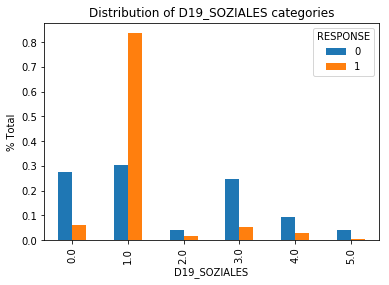

In [92]:
ax = percentages.plot.bar(title='Distribution of D19_SOZIALES categories')
ax.set(ylabel='% Total');

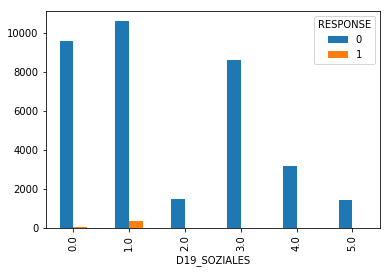

In [78]:
mailout_train_clean.groupby('RESPONSE')[feature].value_counts().unstack(level=0).plot.bar();

D19_SOZIALES is not in the provided data dictionary. It appears to be categorical with values from 0-5. "sozial" means social so it's possible that the feature refers to social groups. 84% of individuals with reponse=1 are in category 1 of D19_SOZIALES as compared to 30% with reponse=0. This means that category 1 individuals are much more likely to respond positively to the marketing campaign.